In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("hotel_booking.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
data.shape

(119390, 36)

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
df=data.drop(columns=["name","email","phone-number",'credit_card'])

In [8]:
df.shape

(119390, 32)

In [10]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [14]:
df["reservation_status_date"].dtypes

dtype('<M8[ns]')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [16]:
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [17]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [18]:
for col in df.select_dtypes(include="object").columns:
    print(col,"\n")
    print(df[col].value_counts())
    print("\n")
    print("-"*50)
    print("\n")

hotel 

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


--------------------------------------------------


arrival_date_month 

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


--------------------------------------------------


meal 

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


--------------------------------------------------


country 

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64


--------------------------------------------------


market_segment 

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct 

In [19]:
df["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [20]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
df.isnull().mean()*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [22]:
df.drop(["company","agent"],axis=1,inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [25]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1518b644110>,
 'caps': [<matplotlib.lines.Line2D at 0x1518b67ab10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1518b674e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1518b731610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1518b6df890>],
 'means': []}

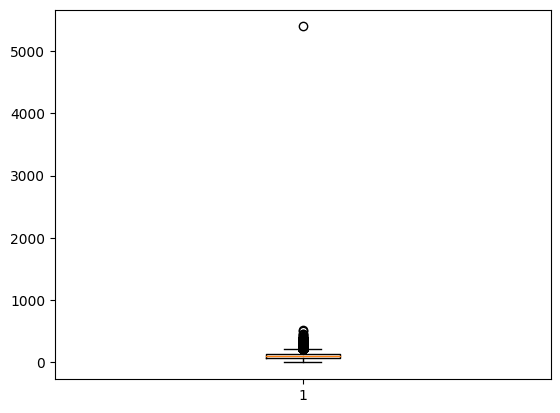

In [26]:
plt.boxplot(df["adr"])

In [27]:
df=df[df["adr"]<5000]

In [28]:
df["adr"].max()

510.0

In [29]:
canceled_per=df["is_canceled"].value_counts(normalize=True)

In [30]:
canceled_per


0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

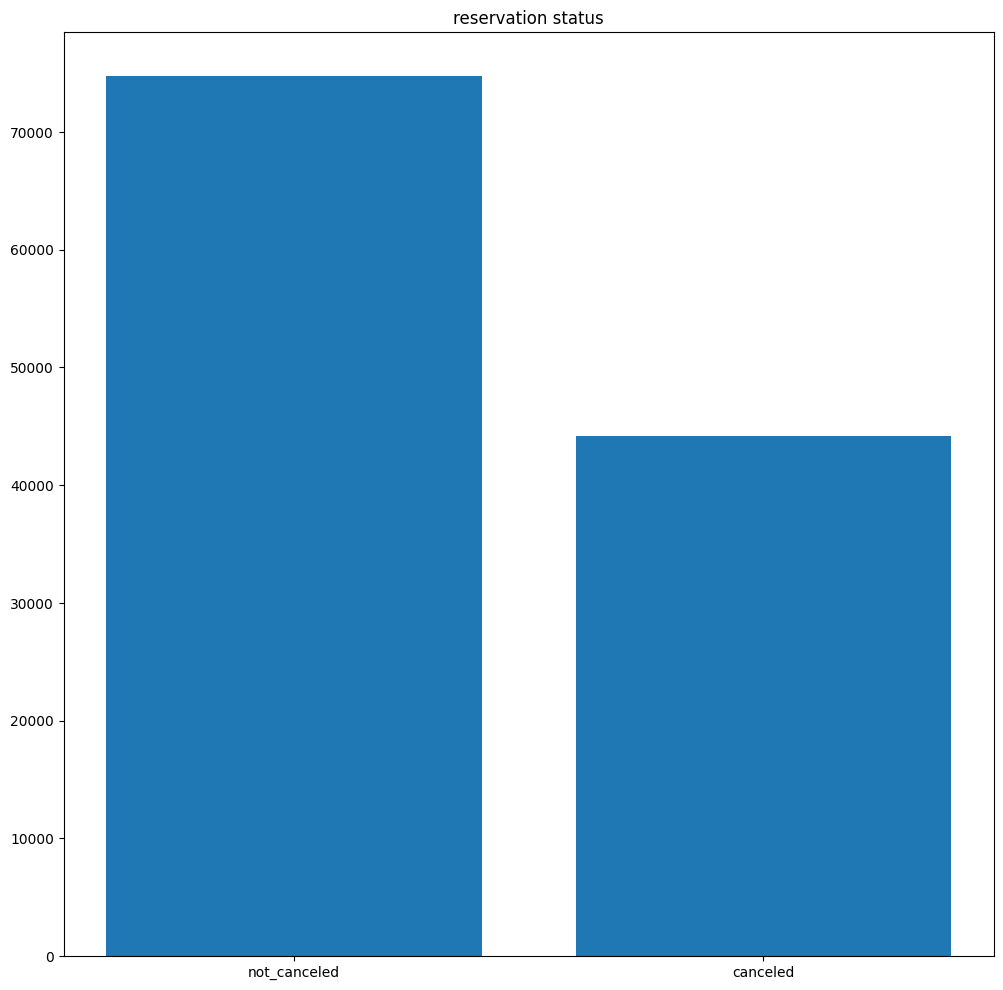

In [31]:
plt.figure(figsize=(12,12))
plt.title("reservation status")
plt.bar(["not_canceled","canceled"],df["is_canceled"].value_counts())
plt.plot

<AxesSubplot: xlabel='hotel', ylabel='count'>

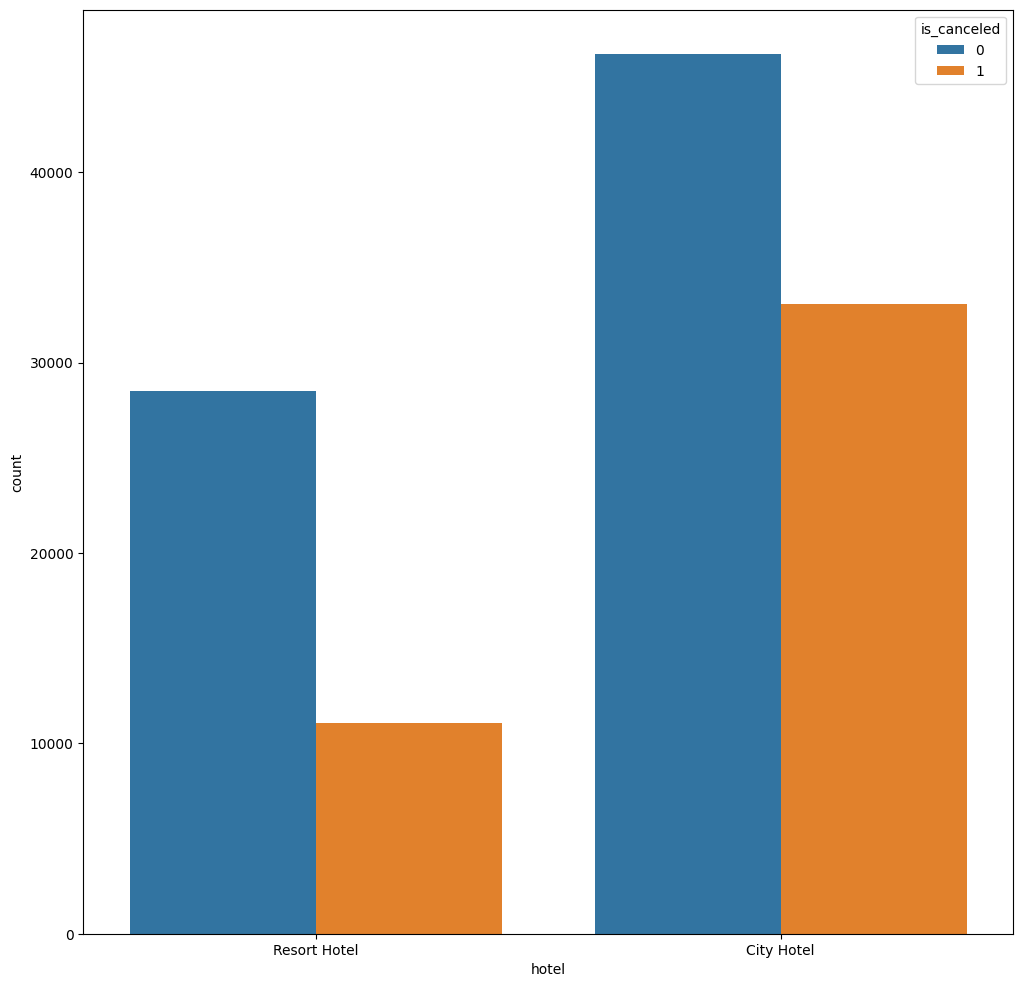

In [33]:
plt.figure(figsize=(12,12))
sns.countplot(x="hotel",hue="is_canceled",data=df)

In [44]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [45]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [49]:
resort_hotel1=resort_hotel.groupby("reservation_status_date")[['adr']].mean()
city_hotel1=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

In [48]:
resort_hotel1

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [50]:
city_hotel1

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


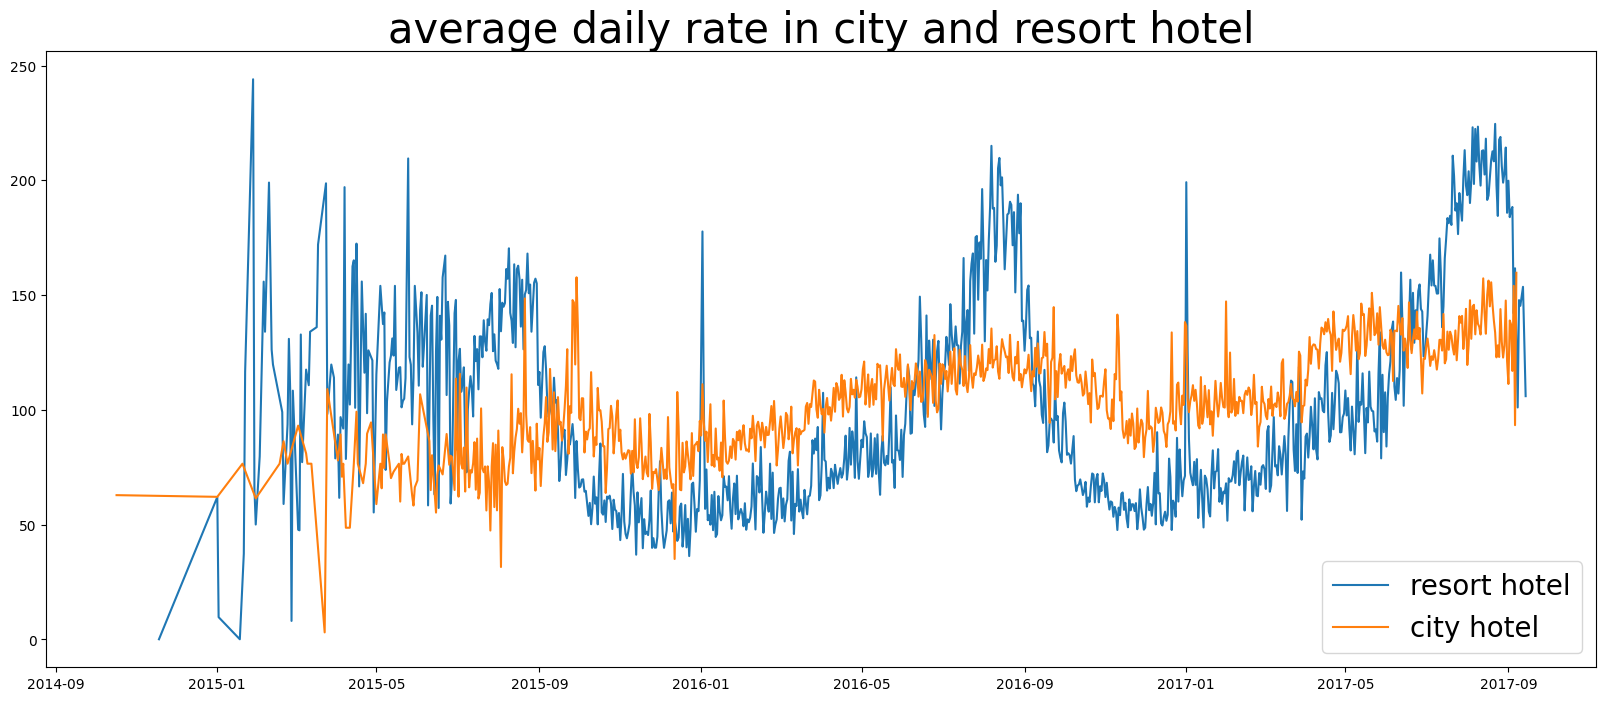

In [54]:
plt.figure(figsize=(20,8))
plt.title("average daily rate in city and resort hotel", fontsize=30)
plt.plot(resort_hotel1.index,resort_hotel1.adr,label="resort hotel")
plt.plot(city_hotel1.index,city_hotel1.adr,label="city hotel")
plt.legend(fontsize=20)

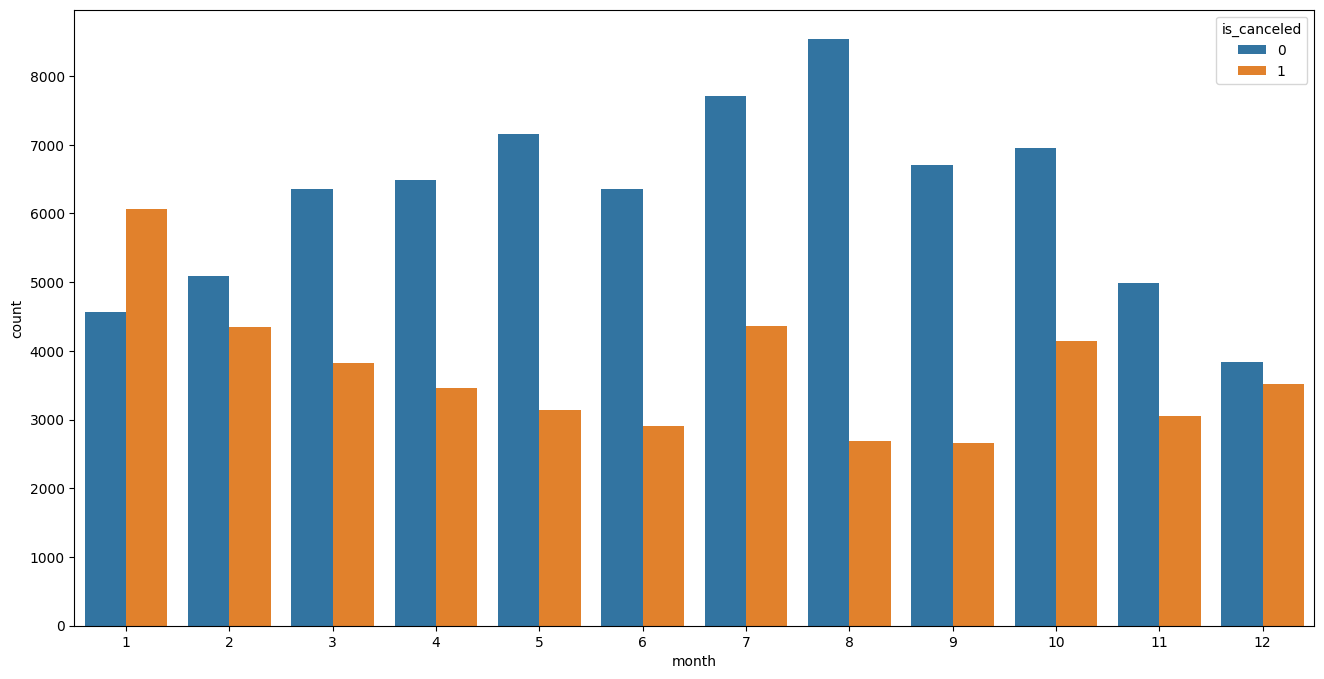

In [61]:
df['month']=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x="month",hue="is_canceled",data=df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


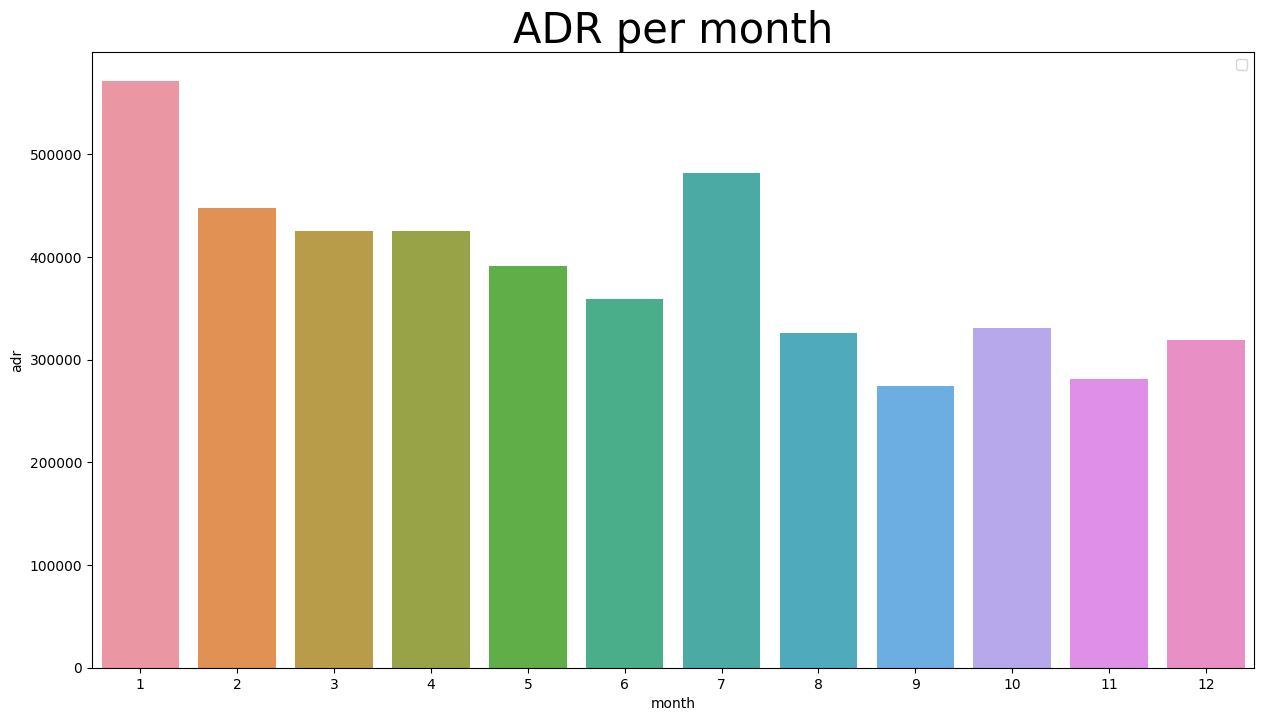

In [76]:
plt.figure(figsize=(15,8))
plt.title("ADR per month", fontsize=30)
# sns.barplot("month","adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum())
sns.barplot(x="month",y="adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


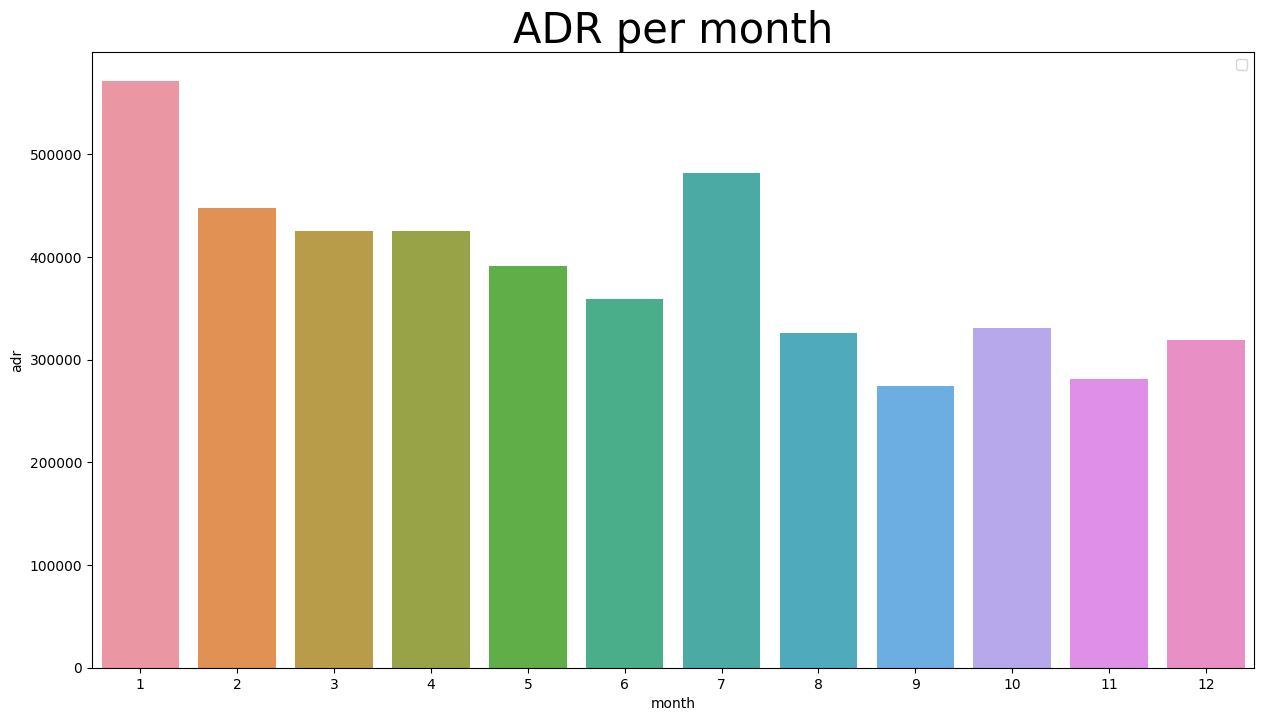

In [75]:
plt.figure(figsize=(15,8))
plt.title("ADR per month", fontsize=30)
sns.barplot(x="month",y="adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
plt.legend()
plt.show()

In [65]:
df[df["is_canceled"]==1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,5
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,5
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,...,1,No Deposit,0,Transient,0.0,0,3,Canceled,2017-04-25,4
111355,City Hotel,1,4,2017,June,23,5,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-06-05,6
111924,City Hotel,1,7,2017,May,22,31,0,1,1,...,0,No Deposit,0,Transient,65.0,0,0,Canceled,2017-05-31,5
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,0,Transient,65.0,0,0,No-Show,2017-07-17,7


In [66]:
df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index()

,month,adr
0,1,571203.57
1,2,447675.76
2,3,424872.56
3,4,425315.23
4,5,391438.08
5,6,359003.34
6,7,481376.17
7,8,325668.43
8,9,274176.33
9,10,330968.87


In [67]:
df[df["is_canceled"]==1].groupby("month")[["adr"]].sum()

,adr
month,
1,571203.57
2,447675.76
3,424872.56
4,425315.23
5,391438.08
6,359003.34
7,481376.17
8,325668.43
9,274176.33


In [68]:
df[df["is_canceled"]==1].groupby("month")[["adr"]]

In [86]:
canceled_data=df[df["is_canceled"]==1]
top10_country=canceled_data["country"].value_counts()[:10]

In [87]:
top10_country.head(20)

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

[]

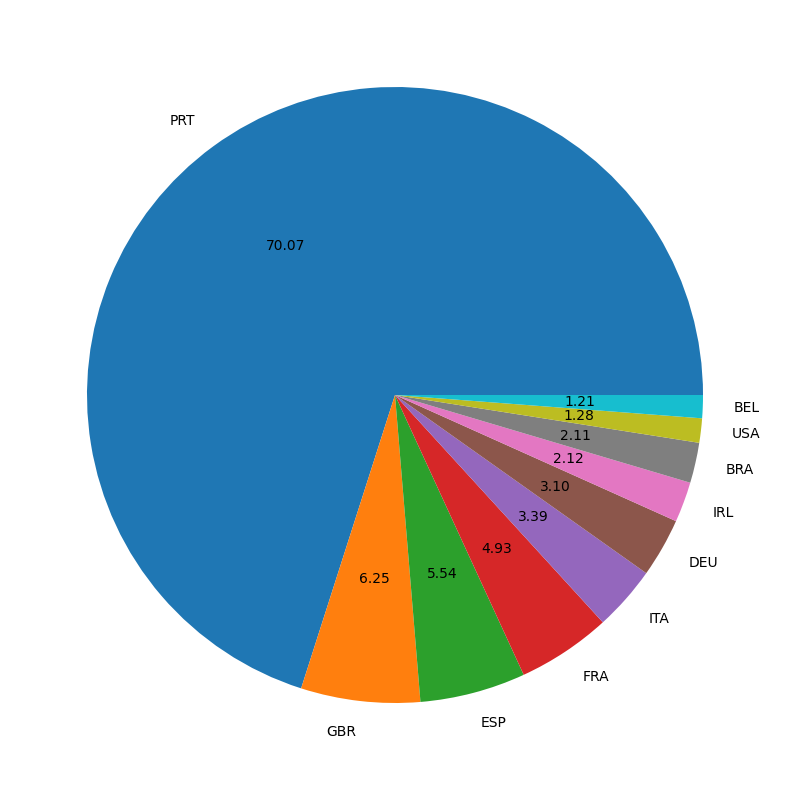

In [89]:
plt.figure(figsize=(10,10))
plt.pie(top10_country,autopct="%.2f",labels=top10_country.index)
plt.plot()

In [90]:
df["market_segment"].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [91]:
df["market_segment"].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [92]:
canceled_data["market_segment"].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [108]:
not_cancelled_df=df[df["is_canceled"]==0]
not_cancelled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9


In [109]:
cancelled_df_adr=canceled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

not_cancelled_df_adr=not_cancelled_df.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values("reservation_status_date",inplace=True)

In [115]:
cancelledadr=cancelled_df_adr[(cancelled_df_adr["reservation_status_date"]>"2016")&(cancelled_df_adr["reservation_status_date"]<"2017-09")]
not_cancelledadr=not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"]>"2016")&(not_cancelled_df_adr["reservation_status_date"]<"2017-09")]

In [110]:
not_cancelled_df_adr

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


In [116]:
not_cancelledadr

,reservation_status_date,adr
185,2016-01-02,143.154565
186,2016-01-03,100.776163
187,2016-01-04,76.913125
188,2016-01-05,82.525818
189,2016-01-06,63.240952
...,...,...
788,2017-08-27,152.494744
789,2017-08-28,150.247197
790,2017-08-29,149.113494
791,2017-08-30,172.943662


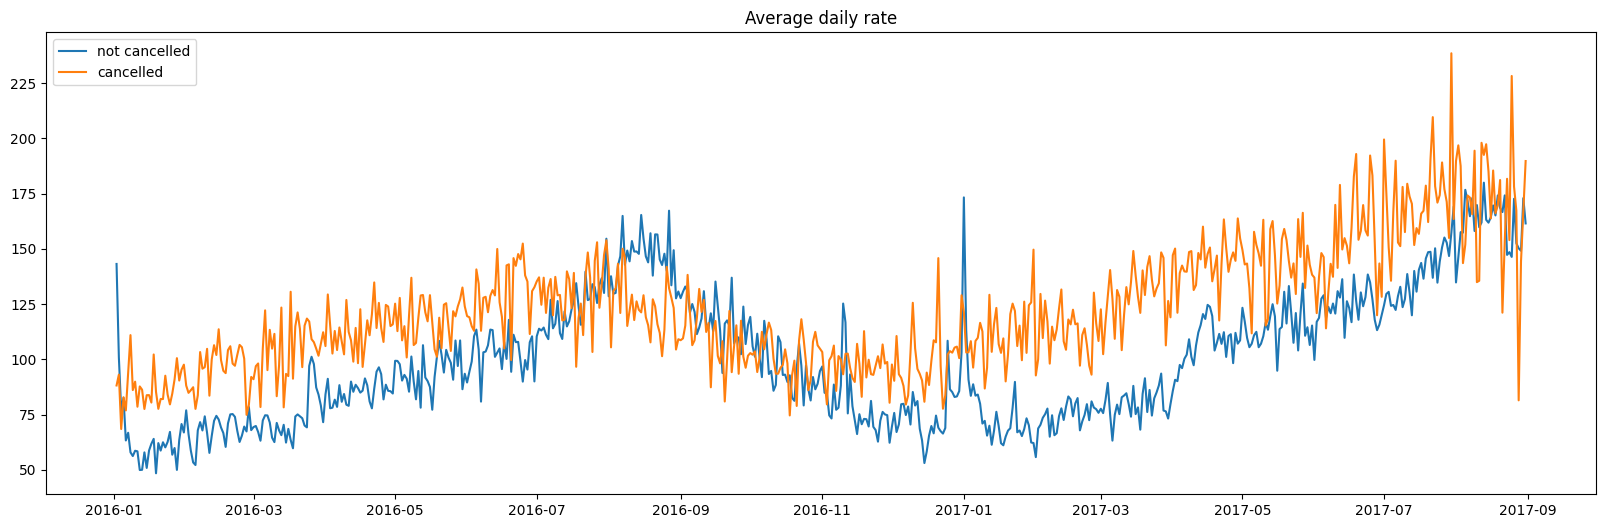

In [117]:
plt.figure(figsize=(20,6))
plt.title("Average daily rate")
plt.plot(not_cancelledadr["reservation_status_date"],not_cancelledadr["adr"],label="not cancelled")
plt.plot(cancelledadr["reservation_status_date"],cancelledadr["adr"],label="cancelled")
plt.legend()